## WaveCluster代码演示

### 自建数据集

首先自己生成一个类似IRIS的数据集

In [3]:
from sklearn.datasets import make_blobs

x1, y1 = make_blobs(n_samples=300, n_features=2, centers=3, random_state=170)

data = x1
target = y1

下面，我们基于原理不断调整参数，观察特征。
找到的较优参数：scale=30, threshold=0.20，达到0.83的NMI。

出现的第一张图是，纵坐标：每个cell内点的数目，横坐标：拥有该数目的cell数。该图可以帮助我们确定参数。

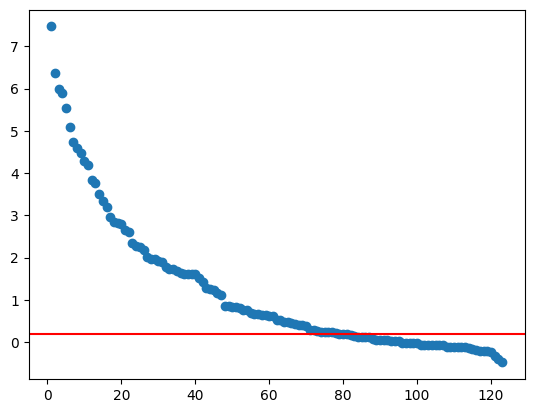

0.8296356869575761


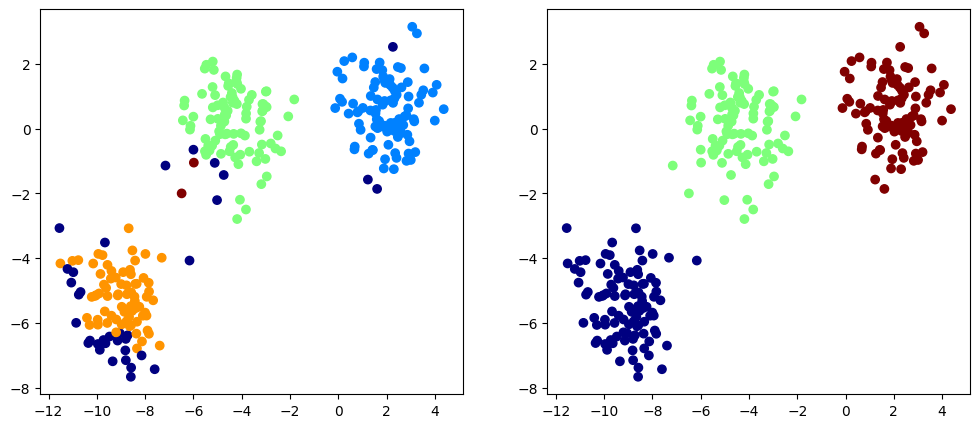

In [14]:

from sklearn import datasets
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi
from waveCluster import *
import pandas as pd
import numpy

tags = waveCluster(data, scale=30, threshold=0.2, plot=True)
true_tags = target

print(nmi(true_tags, tags))

# 创建子图
fig = plt.figure(figsize=(12,5))

# 子图1：聚类标签
ax = fig.add_subplot(1,2,1)
color = tags / np.amax(tags)
rgb = plt.get_cmap('jet')(color)
ax.scatter(data[:,0], data[:,1],color = rgb)

# 子图2: 真实标签
ax = fig.add_subplot(1,2,2)
color = true_tags / np.amax(true_tags)
rgb = plt.get_cmap('jet')(color)
ax.scatter(data[:,0], data[:,1],color = rgb)

plt.show()

# draw2Darray是封装的可视化函数，不需要横向排布的话可以直接调用
# draw2Darray(data[:,0], data[:,1], tags)
# draw2Darray(data[:,0], data[:,1], true_tags)

下面，多提供几套数据集，大家可以调参尝试。

### IRIS

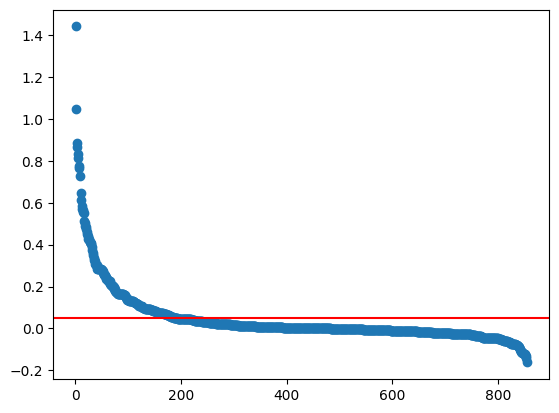

0.2623635539654324


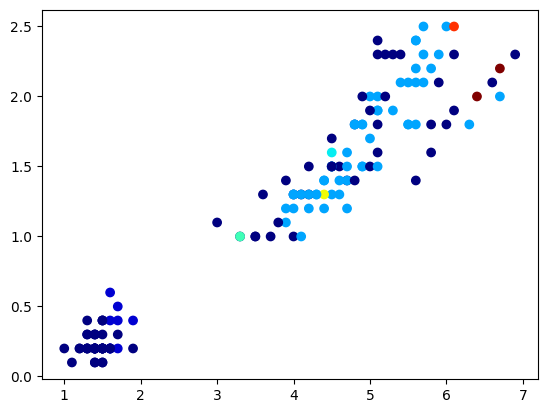

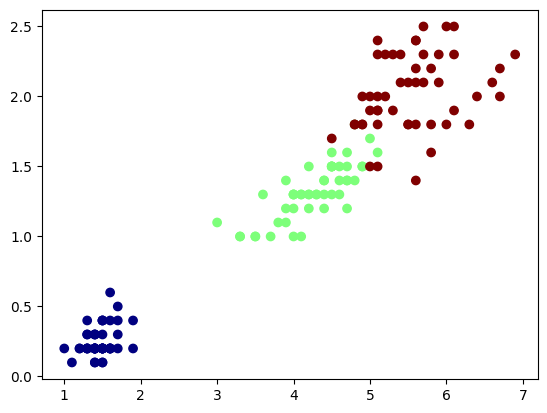

In [29]:
iris = datasets.load_iris()
data = iris.data
target = iris.target

tags = waveCluster(data, scale=20, threshold=0.05, plot=True)
true_tags = target

print(nmi(true_tags, tags))
draw2Darray(data[:,2], data[:,3], tags)
draw2Darray(data[:,2], data[:,3], true_tags)
